In [1]:
!pip install pyspark

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pyspark.sql import SparkSession

# Создание SparkSession
spark = SparkSession.builder \
    .appName("Economic Data Analysis") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://localhost:9000") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

# Установка количества разделов для shuffle операций
spark.conf.set("spark.sql.shuffle.partitions", "50")

24/10/18 23:08:20 WARN Utils: Your hostname, devopsvm resolves to a loopback address: 127.0.1.1; using 172.20.10.3 instead (on interface enp0s3)
24/10/18 23:08:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/18 23:08:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Чтение данных из HDFS
file_path = "hdfs://localhost:9000/user3/hadoop/economic_data/GMKN.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Просмотр первых строк данных
df.show(5)

+--------+-----+--------+------+-------+-------+-------+-------+-----+
|<TICKER>|<PER>|  <DATE>|<TIME>| <OPEN>| <HIGH>|  <LOW>|<CLOSE>|<VOL>|
+--------+-----+--------+------+-------+-------+-------+-------+-----+
|    GMKN|    1|20200825|131300|19500.0|19500.0|19500.0|19500.0|    1|
|    GMKN|    1|20200826|193400|20550.0|20550.0|20550.0|20550.0|    1|
|    GMKN|    1|20200902|225600|20600.0|20600.0|20600.0|20600.0|    4|
|    GMKN|    1|20200902|230500|20600.0|20600.0|20600.0|20600.0|   10|
|    GMKN|    1|20200902|234200|20600.0|20600.0|20600.0|20600.0|    5|
+--------+-----+--------+------+-------+-------+-------+-------+-----+
only showing top 5 rows



In [13]:
pandas_df = df.toPandas()
pandas_df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,GMKN,1,20200825,131300,19500.0,19500.0,19500.0,19500.0,1
1,GMKN,1,20200826,193400,20550.0,20550.0,20550.0,20550.0,1
2,GMKN,1,20200902,225600,20600.0,20600.0,20600.0,20600.0,4
3,GMKN,1,20200902,230500,20600.0,20600.0,20600.0,20600.0,10
4,GMKN,1,20200902,234200,20600.0,20600.0,20600.0,20600.0,5


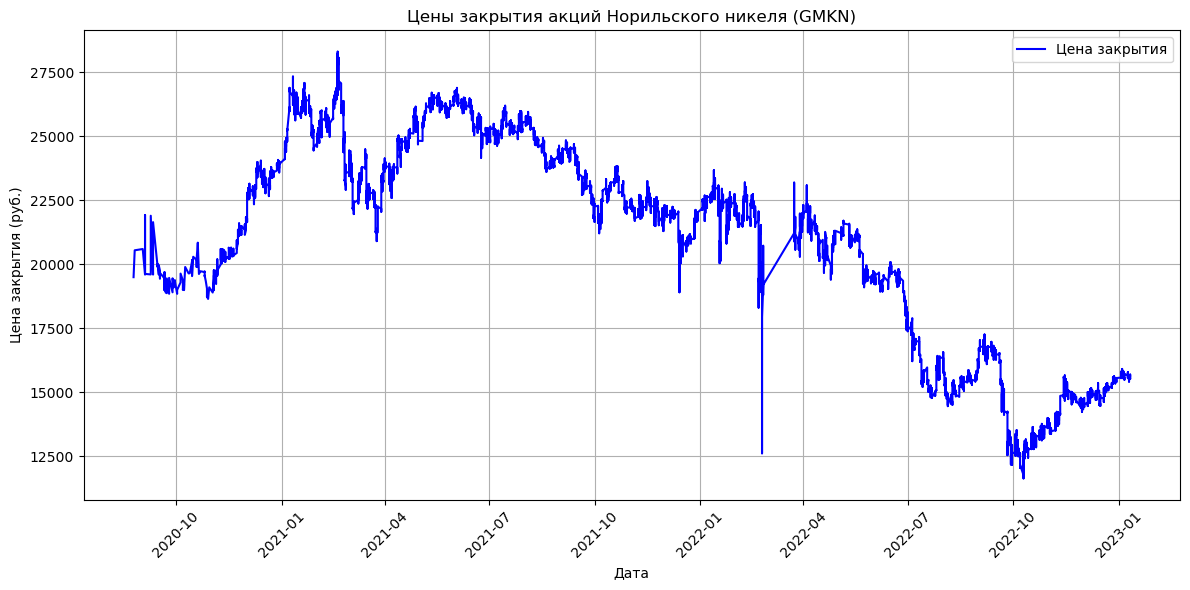

In [14]:

pandas_df['<DATE>'] = pd.to_datetime(pandas_df['<DATE>'], format='%Y%m%d')

plt.figure(figsize=(12, 6))
plt.plot(pandas_df['<DATE>'], pandas_df['<CLOSE>'], label='Цена закрытия', color='blue')

# Настройка графика
plt.title('Цены закрытия акций Норильского никеля (GMKN)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (руб.)')
plt.xticks(rotation=45)  
plt.legend()
plt.grid()

# Показать график
plt.tight_layout()
plt.show()



In [17]:
# Получение уникальных значений из столбца <PER> и <VOL>
unique_per = pandas_df['<PER>'].unique()
unique_vol = pandas_df['<VOL>'].unique()

print("Уникальные значения <PER>:", unique_per)
print("Уникальные значения <VOL>:", unique_vol)

Уникальные значения <PER>: [1]
Уникальные значения <VOL>: [   1    4   10 ...  909 1229  813]


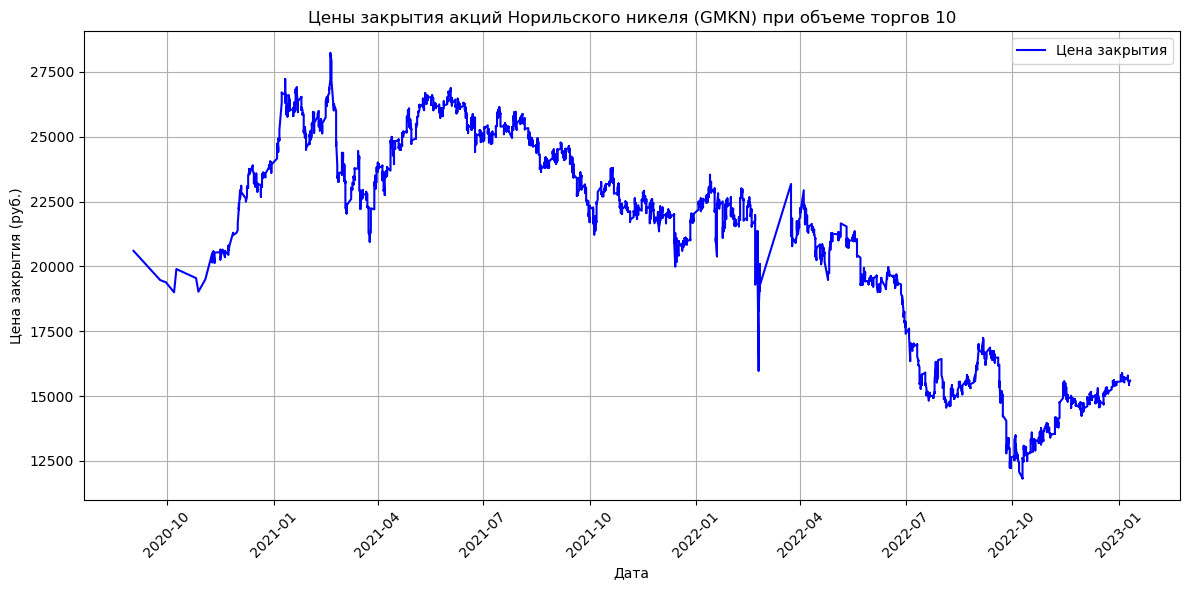

In [22]:
# Предположим, что мы выбрали уникальное значение объёма (например, 1)
selected_volume = 10

# Фильтрация данных по выбранному объему
filtered_data = pandas_df[pandas_df['<VOL>'] == selected_volume]

# Создание графика
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['<DATE>'], filtered_data['<CLOSE>'], label='Цена закрытия', color='blue')

# Настройка графика
plt.title(f'Цены закрытия акций Норильского никеля (GMKN) при объеме торгов {selected_volume}')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия (руб.)')
plt.xticks(rotation=45)  # Поворот дат для удобочитаемости
plt.legend()
plt.grid()

# Показать график
plt.tight_layout()
plt.show()



In [24]:
# Преобразование Pandas DataFrame обратно в PySpark DataFrame
filtered_data_spark = spark.createDataFrame(filtered_data)


In [31]:
# Путь в HDFS для сохранения
hdfs_output_path = "hdfs://localhost:9000/user3/hadoop/economic_data/filtered_data.csv"

# Сохранение отфильтрованных данных в HDFS в формате CSV
filtered_data_spark.write.csv(hdfs_output_path, header=True, mode='overwrite')
